<a href="https://colab.research.google.com/github/BhaveshVadher1/Delhivery---Feature-Engineering/blob/main/CaseStudy_Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import re
from matplotlib import pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/delhivery_data.csv')

##About Delhivery
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#Exploratory Data Analysis

##About given Data

In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Missing value detection
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


In [ ]:
#Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294

###Data type analysis and conversion

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
# converting datetime from object to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

##Exploratory Data Analysis

In [ ]:
aggregated_df = df.groupby('trip_uuid').agg({
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}).reset_index()

# Confirm the aggregation
print("Aggregated DataFrame:\n", aggregated_df.head())

Aggregated DataFrame:
                  trip_uuid  actual_distance_to_destination  actual_time  \
0  trip-153671041653548748                     8860.812105      15682.0   
1  trip-153671042288605164                      240.208306        399.0   
2  trip-153671043369099517                    68163.502238     112225.0   
3  trip-153671046011330457                       28.529648         82.0   
4  trip-153671052974046625                      239.007304        556.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     7787.0     10577.7647               1548.0             1008.0   
1      210.0       269.4308                141.0               65.0   
2    65768.0     89447.2488               3308.0             1941.0   
3       24.0        31.6475                 59.0               16.0   
4      207.0       266.2914                340.0              115.0   

   segment_osrm_distance  
0              1320.4733  
1                84.1894  
2              254

In [ ]:
df_new = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)
df_new

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df["location_level_grouping"] = df["trip_uuid"]+df["source_center"]+df["destination_center"]
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


In [ ]:
df_new = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)
df_new

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182IND131028AABIND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182IND131028AABIND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182IND131028AABIND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182IND131028AABIND000000ACB


In [ ]:
df_new = df_new.groupby("location_level_grouping").agg({"data":"first",
                                               'trip_creation_time' :"first",
                                               'route_schedule_uuid' :"first",
                                               'route_type' :"first",
                                               'trip_uuid' :"first",
                                               'source_center' :"first",
                                               'source_name' :"first",
                                               'destination_center' :"last",
                                               'destination_name' :"last",
                                               'od_start_time' :"first",
                                               'od_end_time' :"first",
                                               'start_scan_to_end_scan' :"first",
                                               'actual_distance_to_destination' :"last",
                                               'actual_time' :"last",
                                               'osrm_time' :"last",
                                               'osrm_distance' :"last",
                                               'segment_actual_time' :"sum",
                                               'segment_osrm_time' :"sum",
                                               'segment_osrm_distance' :"sum",
                                               }).reset_index()

In [ ]:
df_new = df.reset_index().groupby(["trip_uuid"]).agg(
    {"source_center" : "last" ,"source_name" : "last" , "data" : "min" ,"trip_creation_time" : "min",

    "route_schedule_uuid" : "min" , "route_type" : "min" , "destination_center" : "first","destination_name":"first",
     "od_start_time" : "last" , "od_end_time" : "first" , "start_scan_to_end_scan" : "sum" ,
     "actual_distance_to_destination":"sum","actual_time" : "sum" , "osrm_time" : "sum", "osrm_distance" : "sum",
     "segment_actual_time" : "sum" ,  "segment_osrm_time" : "sum" ,  "segment_osrm_distance" : "sum"
   })

In [ ]:
df_new


,source_center,source_name,data,trip_creation_time,route_schedule_uuid,route_type,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733
trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894
trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583201AAA,Hospet (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 02:34:10.515593,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trip-153861095625827784,IND160102AAD,Chandigarh_Raiprkln_C (Chandigarh),test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND140603AAA,Zirakpur_DC (Punjab),2018-10-04 04:56:10.943956,2018-10-04 02:28:43.529141,876.0,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551
trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,120.0,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883
trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,1263.0,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866


In [ ]:
categorical_vars = ['data', 'route_type']
for var in categorical_vars:
    print(f"Unique values for {var}:\n{df[var].value_counts()}\n")

Unique values for data:
training    104858
test         40009
Name: data, dtype: int64

Unique values for route_type:
FTL        99660
Carting    45207
Name: route_type, dtype: int64



In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                 start_scan_to_end_scan  is_cutoff  \
start_scan_to_end_scan                        1.000000   0.299099   
is_cutoff                                     0.299099   1.000000   
cutoff_factor                                 0.784673   0.190815   
actual_distance_to_destination                0.785006   0.191571   
actual_time                                   0.785937   0.168265   
osrm_time                                     0.785298   0.186484   
osrm_distance                                 0.784138   0.188245   
factor                                       -0.023193  -0.121386   
segment_actual_time                           0.093301  -0.007042   
segment_osrm_time                             0.219848   0.216321   
segment_osrm_distance                         0.306983   0.254645   
segment_factor                               -0.020227  -0.106569   

                                cutoff_factor  actual_distance_to_destination  \


<ipython-input-104-8e09bd3e2971>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


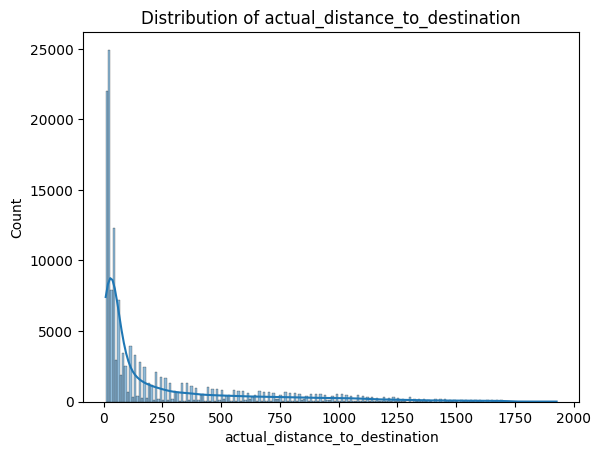

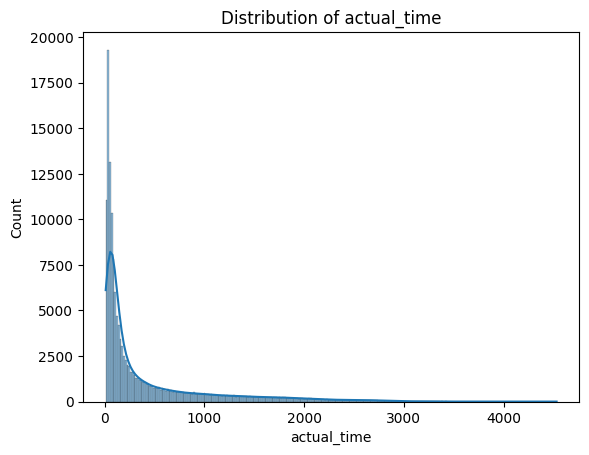

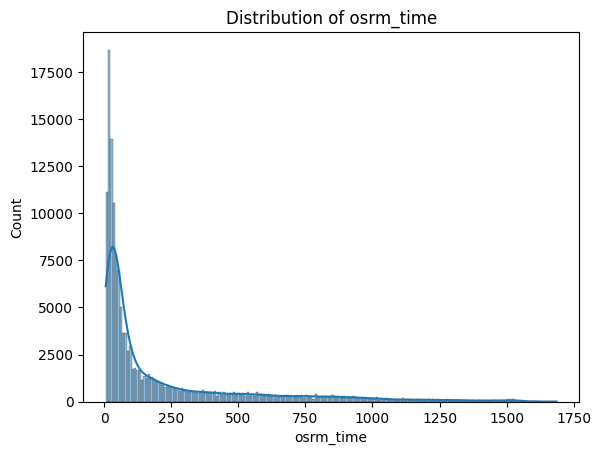

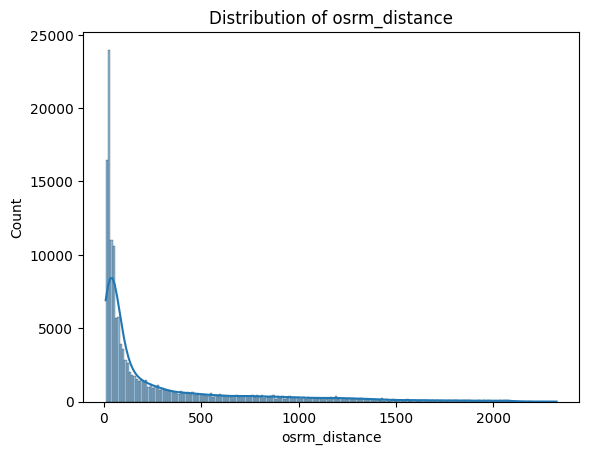

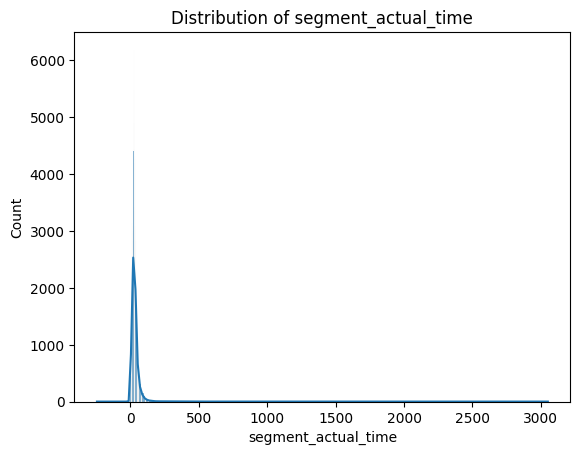

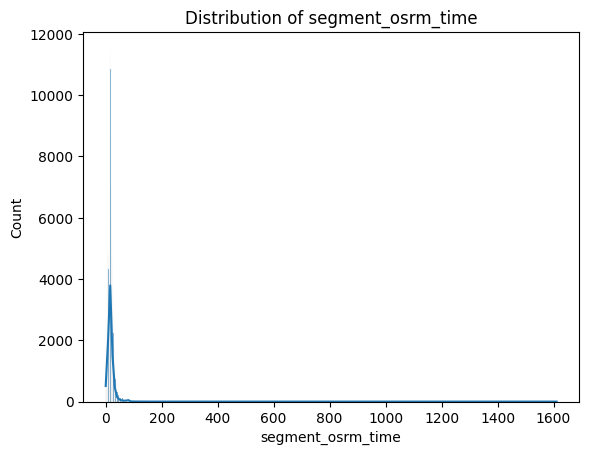

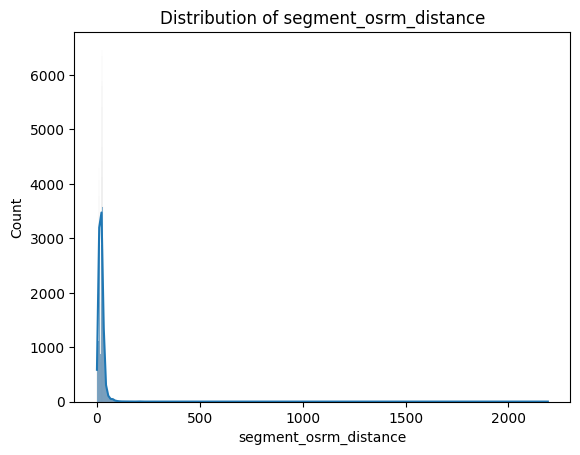

In [ ]:
# Distribution plots for continuous variables
continuous_vars = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for var in continuous_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

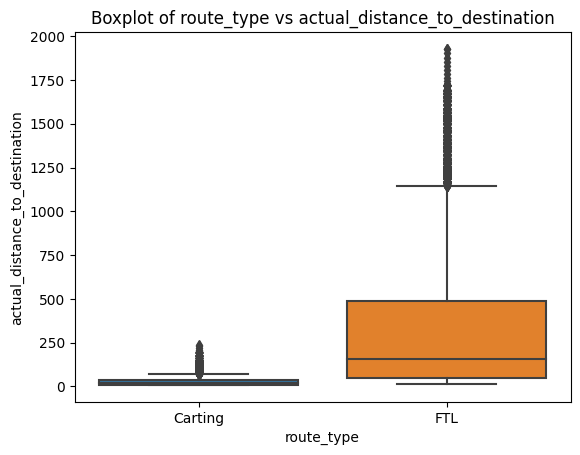

In [ ]:
# Box plots for categorical variables
categorical_vars = ['route_type']
for var in categorical_vars:
    sns.boxplot(x=var, y='actual_distance_to_destination', data=df)
    plt.title(f'Boxplot of {var} vs actual_distance_to_destination')
    plt.show()

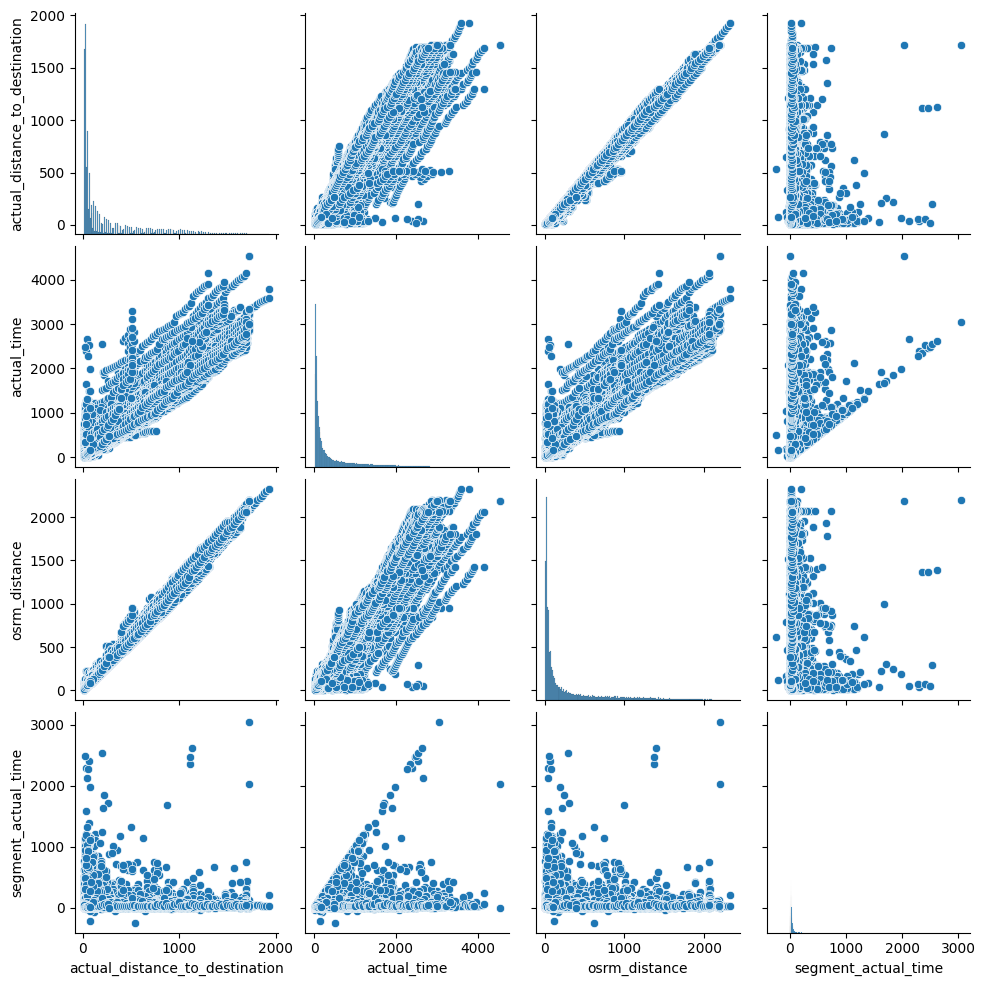

In [ ]:
# Selecting a subset of variables for the pairplot
selected_vars = ['actual_distance_to_destination', 'actual_time', 'osrm_distance', 'segment_actual_time']
sns.pairplot(df[selected_vars])
plt.show()

#Feature Creation

In [ ]:
# Extract features from destination_name and source_name
df['destination_city'] = df['destination_name'].apply(lambda x: x.split('_')[0] if pd.notnull(x) else np.nan)
df['destination_state'] = df['destination_name'].apply(lambda x: re.search(r'\((.*?)\)', str(x)).group(1) if pd.notnull(x) else np.nan)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,location_level_grouping,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat


In [ ]:
df['source_city'] = df['source_name'].apply(lambda x: x.split('_')[0] if pd.notnull(x) else np.nan)
df['source_state'] = df['source_name'].apply(lambda x: re.search(r'\((.*?)\)', str(x)).group(1) if pd.notnull(x) else np.nan)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,location_level_grouping,destination_city,destination_state,source_city,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat


<Axes: xlabel='destination_state'>

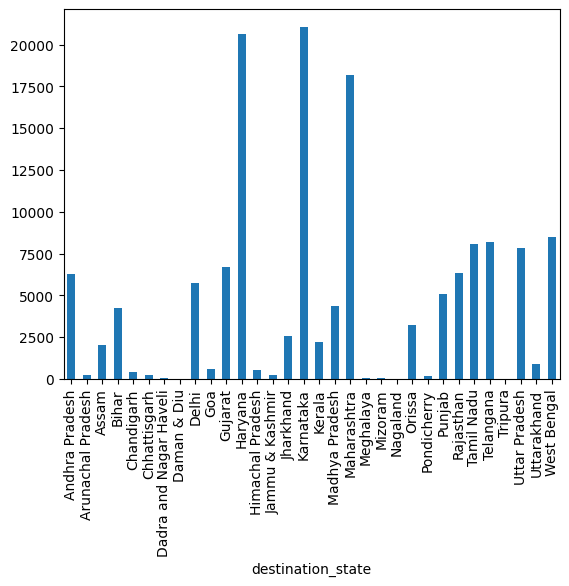

In [ ]:
df.groupby("destination_state")["trip_uuid"].count().plot(kind="bar")

In [ ]:
# Extract features from trip_creation_time
df['trip_creation_month'] = pd.to_datetime(df['trip_creation_time']).dt.month
df['trip_creation_year'] = pd.to_datetime(df['trip_creation_time']).dt.year
df['trip_creation_day'] = pd.to_datetime(df['trip_creation_time']).dt.day
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,location_level_grouping,destination_city,destination_state,source_city,source_state,trip_creation_month,trip_creation_year,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20


<Axes: xlabel='trip_creation_month'>

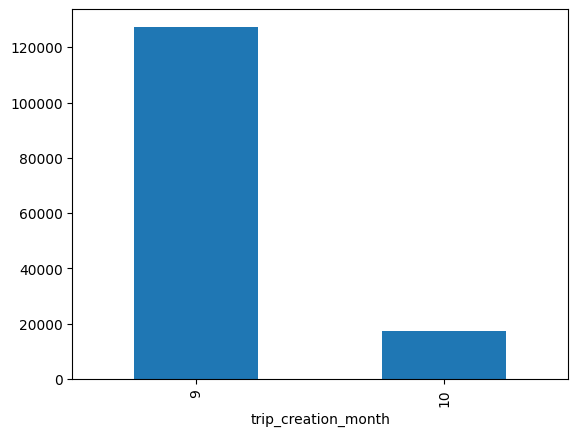

In [ ]:
df.groupby("trip_creation_month")["trip_uuid"].count().plot(kind="bar")

In [ ]:
# Calculate time taken between od_start_time and od_end_time
df['time_taken'] = pd.to_datetime(df['od_end_time']) - pd.to_datetime(df['od_start_time'])


In [ ]:
df['trip_duration_minutes'] = (pd.to_datetime(df['od_end_time']) - pd.to_datetime(df['od_start_time'])).dt.total_seconds() / 60
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,location_level_grouping,destination_city,destination_state,source_city,source_state,trip_creation_month,trip_creation_year,trip_creation_day,time_taken,trip_duration_minutes
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,trip-153741093647649320IND388121AAAIND388620AAB,Khambhat,Gujarat,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637


In [ ]:
# Count of trips per month
trip_count_per_month = df.groupby('trip_creation_month').size()

# Count of trips per year
trip_count_per_year = df.groupby('trip_creation_year').size()

print("Trip count per month:\n", trip_count_per_month)
print("\nTrip count per year:\n", trip_count_per_year)

Trip count per month:
 trip_creation_month
9     127349
10     17518
dtype: int64

Trip count per year:
 trip_creation_year
2018    144867
dtype: int64


In [ ]:
# trip duration in minutes
df['trip_duration_minutes'] = (pd.to_datetime(df['od_end_time']) - pd.to_datetime(df['od_start_time'])).dt.total_seconds() / 60

# Extracting day of the week for trip creation
df['day_of_week'] = pd.to_datetime(df['trip_creation_time']).dt.day_name()

# Distance per segment
df['distance_per_segment'] = df['segment_osrm_distance'] / df['segment_actual_time']

# Average speed
df['average_speed_kmph'] = df['actual_distance_to_destination'] / (df['actual_time'] / 60)

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_city,source_state,trip_creation_month,trip_creation_year,trip_creation_day,time_taken,trip_duration_minutes,day_of_week,distance_per_segment,average_speed_kmph
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637,Thursday,0.854664,44.724258
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637,Thursday,0.975900,47.342106
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637,Thursday,0.675950,41.455919
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637,Thursday,0.620114,34.952931
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,Gujarat,9,2018,20,0 days 01:26:12.818197,86.213637,Thursday,0.652550,34.752388


In [ ]:
#Dropping some Unimportant Columns
columns_to_drop = ['data', 'route_schedule_uuid', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(columns=columns_to_drop, inplace=True)

# Journey time per segment
df['journey_time_per_segment_minutes'] = df['segment_osrm_time']

# DataFrame with new features
print("Updated DataFrame with new features:\n", df.head())

Updated DataFrame with new features:
           trip_creation_time route_type                trip_uuid  \
0 2018-09-20 02:35:36.476840    Carting  trip-153741093647649320   
1 2018-09-20 02:35:36.476840    Carting  trip-153741093647649320   
2 2018-09-20 02:35:36.476840    Carting  trip-153741093647649320   
3 2018-09-20 02:35:36.476840    Carting  trip-153741093647649320   
4 2018-09-20 02:35:36.476840    Carting  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
3  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
4  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   

                destination_name              od_start_time  \
0  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32.418600   
1  Khambhat_MotvdDPP_D (Gujara

#Merging of rows and aggregation of fields

In [ ]:
# Aggregation of numeric columns using appropriate aggregation functions.
aggregated_df = df.groupby('trip_uuid').agg({
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'trip_duration_minutes': 'mean',
    'average_speed_kmph': 'mean'
}).reset_index()
aggregated_df.head()


,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_duration_minutes,average_speed_kmph
0,trip-153671041653548748,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,1120.012629,35.680717
1,trip-153671042288605164,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,101.463787,37.689921
2,trip-153671043369099517,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,2794.318918,37.039417
3,trip-153671046011330457,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,100.494935,23.543243
4,trip-153671052974046625,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,226.958714,28.087062


#Comparison & Visualization of time and distance fields

In [ ]:
#Summary statistics for time and distance fields
time_distance_summary = aggregated_df[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'segment_osrm_distance', 'segment_osrm_time']].describe()

print("Summary Statistics for Time and Distance Fields:\n", time_distance_summary)


Summary Statistics for Time and Distance Fields:
        actual_distance_to_destination    actual_time     osrm_time  \
count                    14817.000000   14817.000000  14817.000000   
mean                      2288.554169    4076.333941   2091.007289   
std                       8798.110164   15216.870041   7956.882351   
min                          9.002461       9.000000      6.000000   
25%                         49.597866     142.000000     62.000000   
50%                        134.059655     348.000000    167.000000   
75%                        463.956888    1063.000000    516.000000   
max                      85110.885093  167920.000000  76953.000000   

       segment_osrm_distance  segment_osrm_time  
count           14817.000000       14817.000000  
mean              223.201161         180.949787  
std               416.628374         314.542047  
min                 9.072900           6.000000  
25%                32.654500          31.000000  
50%                

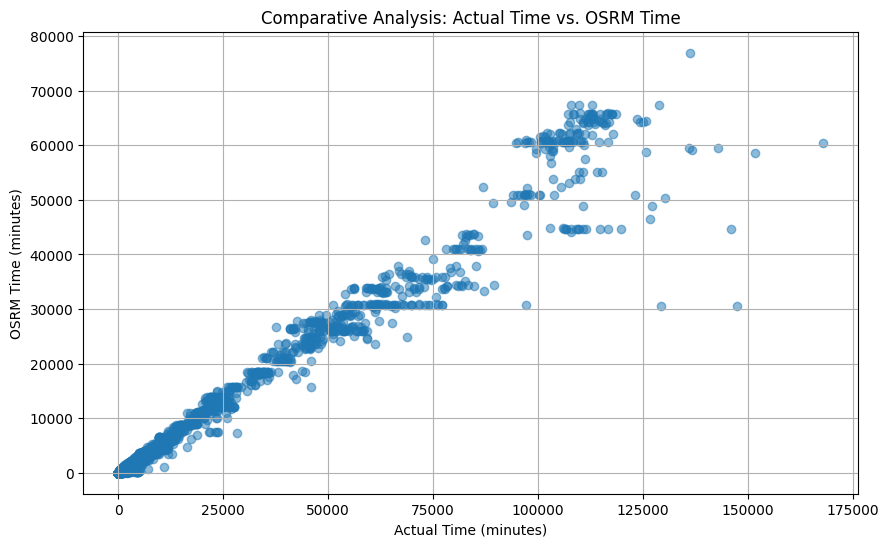

In [ ]:
# Comparative analysis: Actual Time vs. OSRM Time
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['actual_time'], aggregated_df['osrm_time'], alpha=0.5)
plt.xlabel('Actual Time (minutes)')
plt.ylabel('OSRM Time (minutes)')
plt.title('Comparative Analysis: Actual Time vs. OSRM Time')
plt.grid(True)
plt.show()

###Insights from Comparative Analysis:
The scatter plot compares the actual time taken for trips vs. the time calculated by the OSRM routing engine.

A strong linear relationship indicates accurate estimation by the OSRM routing engine.

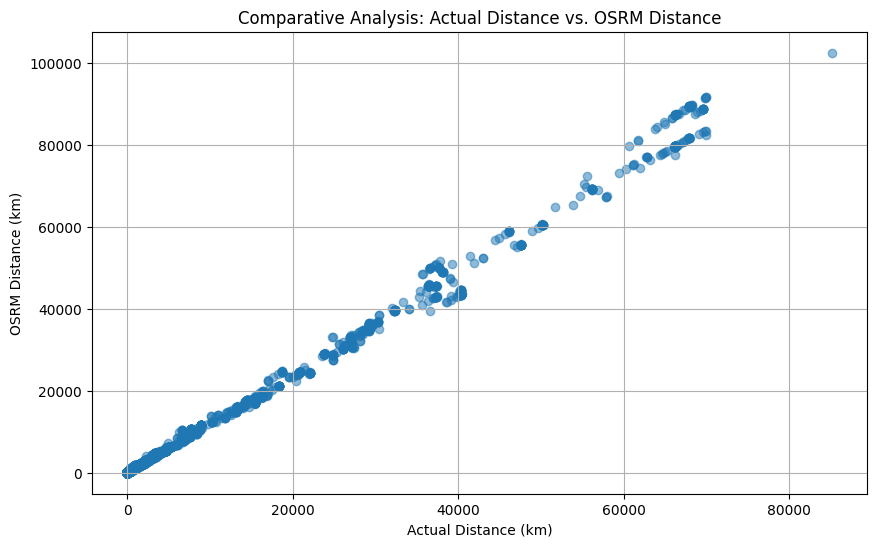

In [ ]:
# Comparative analysis: Actual Distance vs. OSRM Distance
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['actual_distance_to_destination'], aggregated_df['osrm_distance'], alpha=0.5)
plt.xlabel('Actual Distance (km)')
plt.ylabel('OSRM Distance (km)')
plt.title('Comparative Analysis: Actual Distance vs. OSRM Distance')
plt.grid(True)
plt.show()

###Insights from Comparative Analysis:
The scatter plot compares the actual distance traveled for trips vs. the distance calculated by the OSRM routing engine.

A strong linear relationship indicates accurate estimation by the OSRM routing engine.

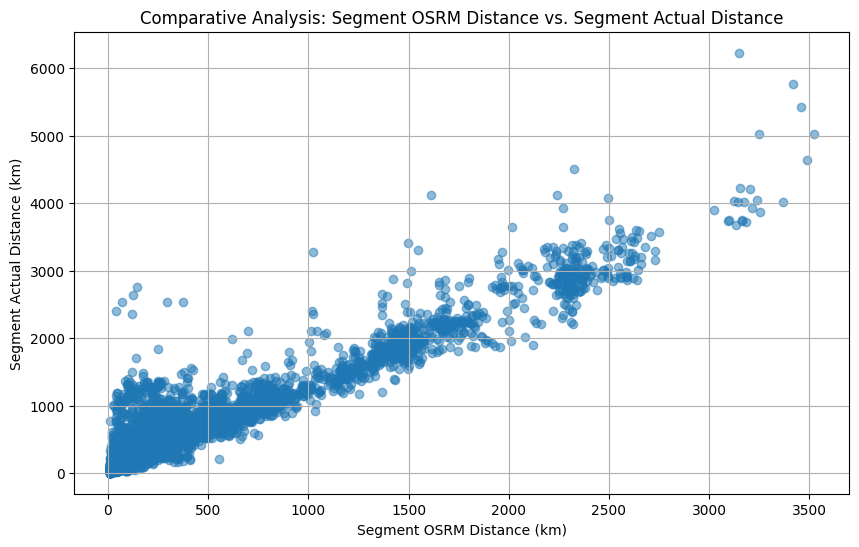

In [ ]:
# Comparative analysis: Segment Distance vs. Segment OSRM Distance
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['segment_osrm_distance'], aggregated_df['segment_actual_time'], alpha=0.5)
plt.xlabel('Segment OSRM Distance (km)')
plt.ylabel('Segment Actual Distance (km)')
plt.title('Comparative Analysis: Segment OSRM Distance vs. Segment Actual Distance')
plt.grid(True)
plt.show()

###Insights from Comparative Analysis:
The scatter plot compares the segment distance calculated by OSRM vs. the actual segment distance.

A strong linear relationship indicates accurate estimation by the OSRM routing engine for smaller segments.

#Missing values Treatment & Outlier treatment

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
# Calculate the total number of rows in the dataframe
total_rows = aggregated_df.shape[0]

# Calculate the number of outliers and their percentage for each specified column
outliers_count_percentage = {}
for col in columns_for_outlier_treatment:
    outliers_count = outliers_count_dict[col]
    outliers_percentage = (outliers_count / total_rows) * 100
    outliers_count_percentage[col] = {'count': outliers_count, 'percentage': outliers_percentage}

# Display the count and percentage of outliers for each column
print("Outliers Count and Percentage per Column:")
for col, info in outliers_count_percentage.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")


Outliers Count and Percentage per Column:
actual_distance_to_destination: 2122 outliers (14.32%)
actual_time: 2070 outliers (13.97%)
osrm_time: 1948 outliers (13.15%)
segment_osrm_distance: 1548 outliers (10.45%)
segment_osrm_time: 1492 outliers (10.07%)


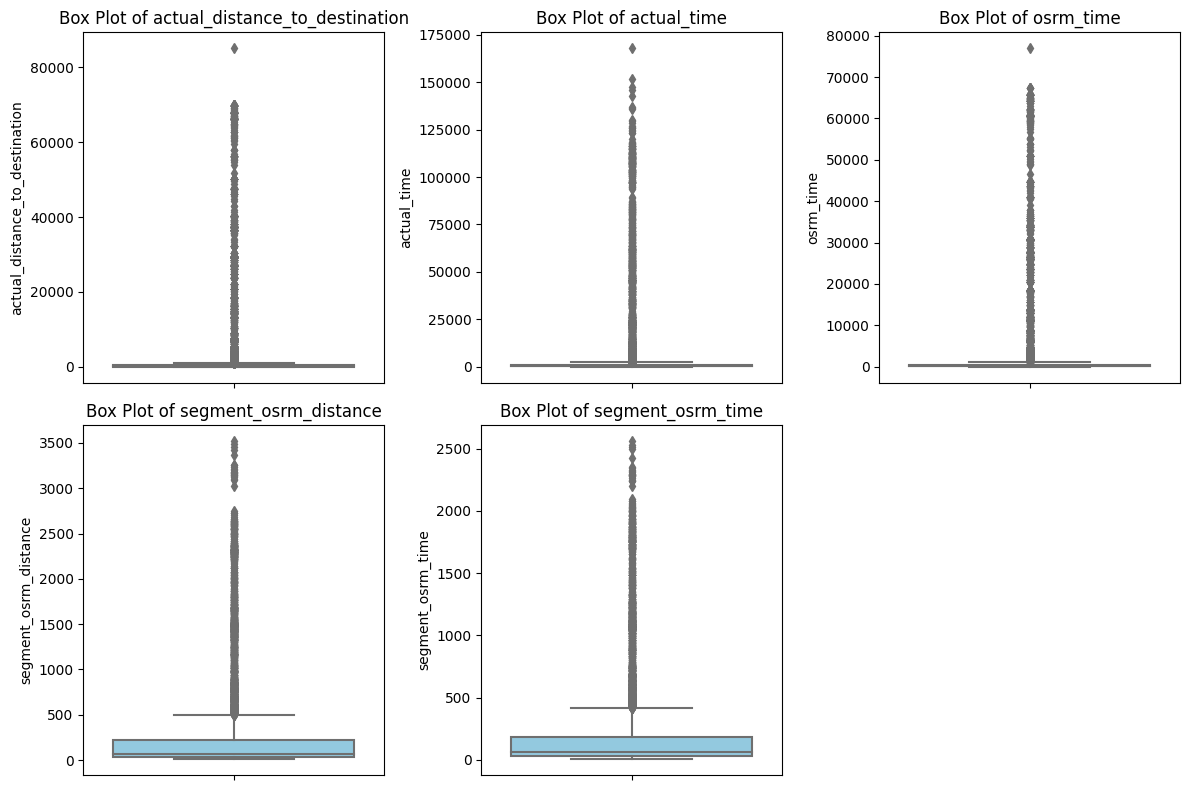

In [ ]:
# Create box plots for each specified column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_for_outlier_treatment, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=aggregated_df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Impute missing values based on appropriate methods
aggregated_df.fillna({
    'actual_distance_to_destination': aggregated_df['actual_distance_to_destination'].median(),
    'actual_time': aggregated_df['actual_time'].median(),
    'osrm_time': aggregated_df['osrm_time'].median(),
    'segment_osrm_distance': aggregated_df['segment_osrm_distance'].median(),
    'segment_osrm_time': aggregated_df['segment_osrm_time'].median()
}, inplace=True)

# Check for missing values after handling
missing_values_after = aggregated_df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values after handling:
 trip_uuid                         0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
trip_duration_minutes             0
average_speed_kmph                0
dtype: int64


In [ ]:
# Since percentage of outlier is high(6%-9%), we can not ingore this value also imputation can not be done using mean. Hence replacing outlier with median
columns_for_outlier_treatment = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'segment_osrm_distance', 'segment_osrm_time']

# Function to detect and handle outliers using IQR
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

    # Replace outliers with median
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])

    return outliers_count

# Detect and handle outliers for each column
outliers_count_dict = {}
for col in columns_for_outlier_treatment:
    outliers_count_dict[col] = handle_outliers_iqr(aggregated_df, col)

print("\nOutliers Count and Treatment using IQR:\n", outliers_count_dict)



Outliers Count and Treatment using IQR:
 {'actual_distance_to_destination': 1384, 'actual_time': 1366, 'osrm_time': 1325, 'segment_osrm_distance': 922, 'segment_osrm_time': 784}


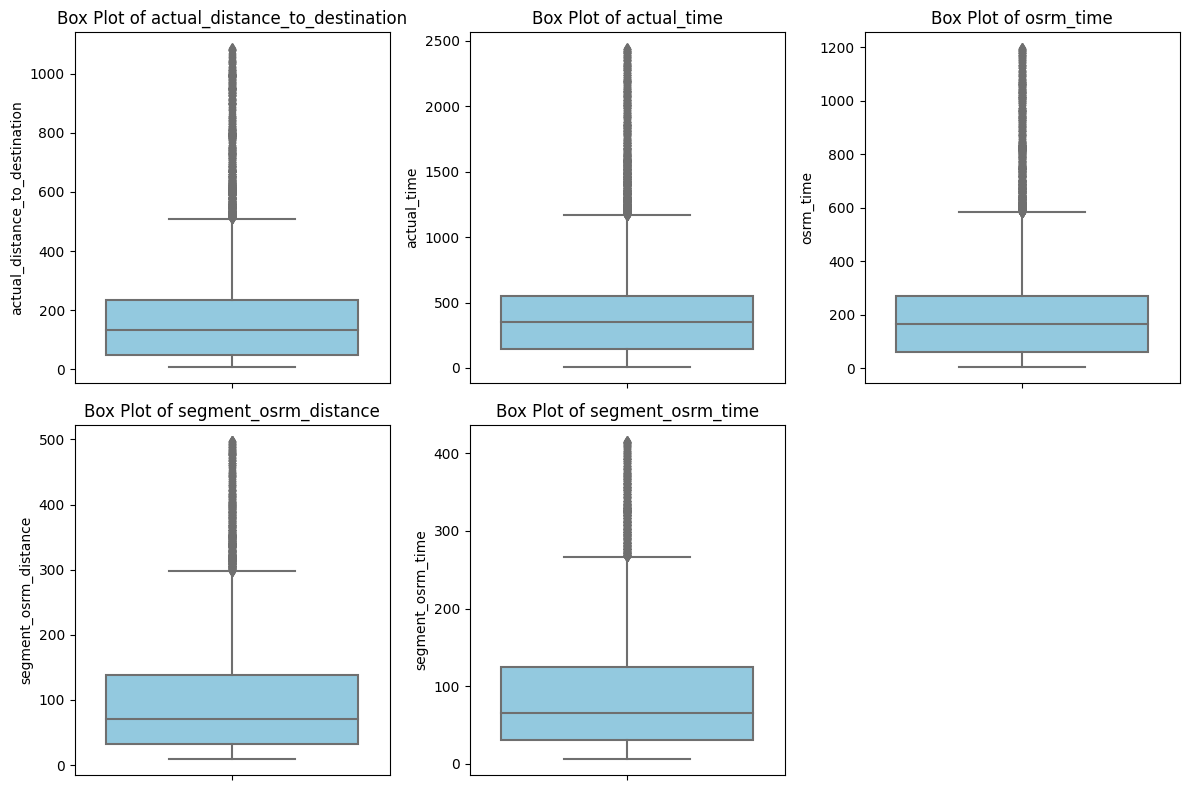

In [ ]:
# Create box plots for each specified column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_for_outlier_treatment, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=aggregated_df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#Checking relationship between aggregated fields

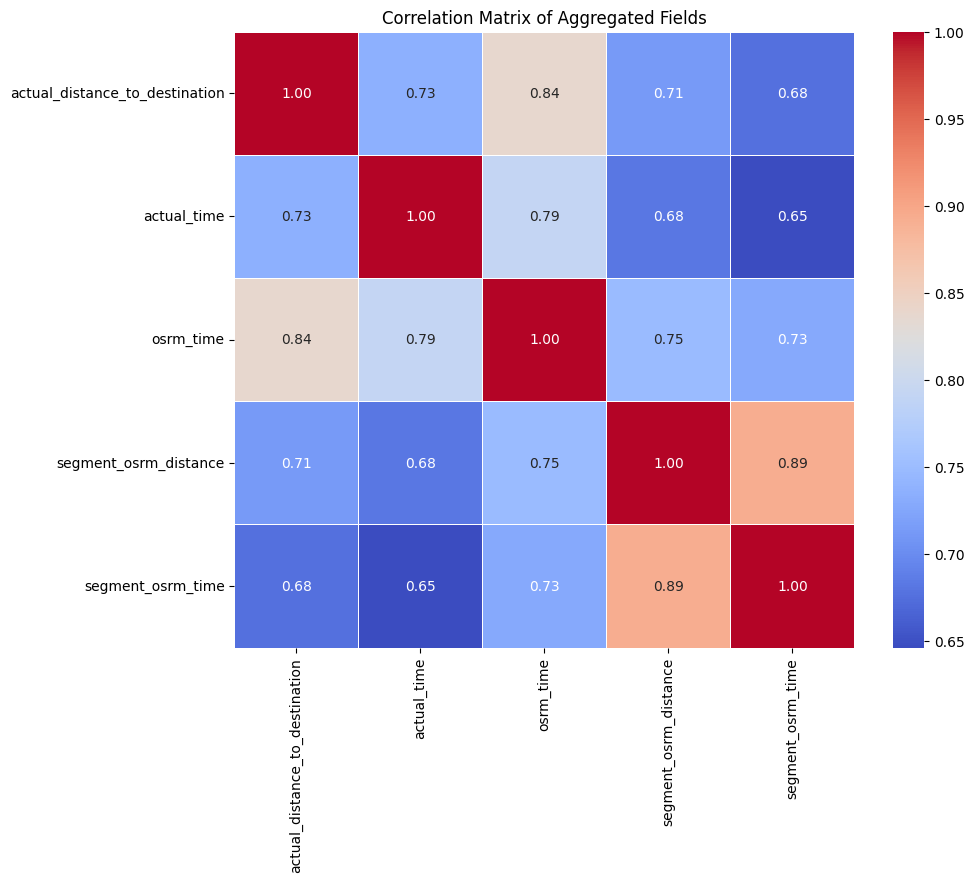

In [ ]:
correlation_matrix = aggregated_df[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'segment_osrm_distance', 'segment_osrm_time']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Aggregated Fields')
plt.show()

### Hypothesis Testing between actual_time and OSRM time
Null Hypothesis (H0):

There is no significant difference in mean time between actual_time and osrm_time.

Alternate Hypothesis (Ha):

There is a significant difference in mean time between actual_time and osrm_time.

In [ ]:
# Hypothesis Testing between actual_time and OSRM time
from scipy.stats import ttest_ind

# Hypothesis Testing: t-test
actual_time = aggregated_df['actual_time']
osrm_time = aggregated_df['osrm_time']

t_stat, p_value = ttest_ind(actual_time, osrm_time)
print("Hypothesis Testing Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Hypothesis Testing Results:
T-statistic: 54.805204801820594
P-value: 0.0


Since the p-value is not less than the chosen significance level (alpha 0.05), we are unable to reject the null hypothesis and conclude that there is no significant difference in actual_time and OSMR time.

Now, Visualising same using Plot.

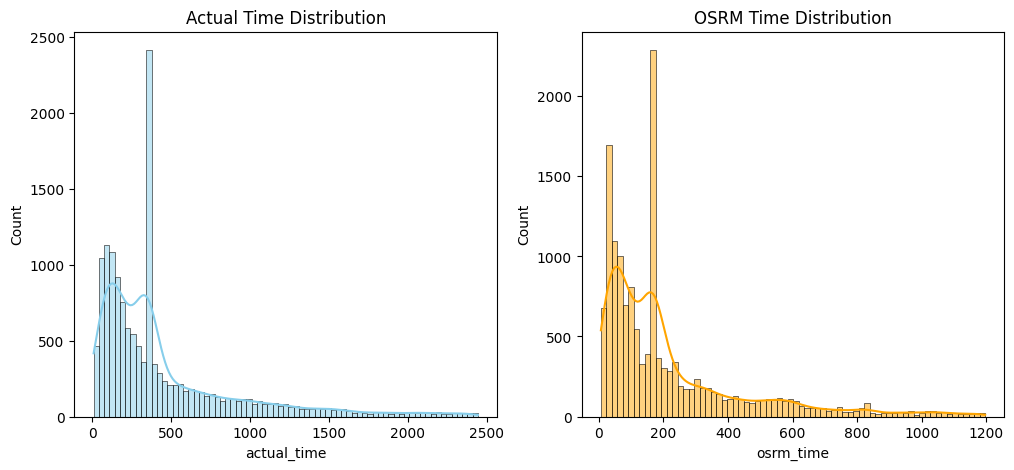

Hypothesis Testing Results:
T-statistic: 54.805204801820594
P-value: 0.0


In [ ]:
# Visual Analysis between actual_time and OSRM time
from scipy.stats import ttest_ind

# Hypothesis Testing: t-test
actual_time = aggregated_df['actual_time']
osrm_time = aggregated_df['osrm_time']

t_stat, p_value = ttest_ind(actual_time, osrm_time)

# Visual Analysis: Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(actual_time, kde=True, color='skyblue')
plt.title('Actual Time Distribution')

plt.subplot(1, 2, 2)
sns.histplot(osrm_time, kde=True, color='orange')
plt.title('OSRM Time Distribution')

plt.show()

print("Hypothesis Testing Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


### Hypothesis Testing between actual_time and segment_actual_time
Null Hypothesis (H0):

There is no significant difference in mean time between actual_time and segment_actual_time.

Alternate Hypothesis (Ha):

There is a significant difference in mean time between actual_time and segment_actual_time.

In [ ]:
#Hypothesis Testing between actual_time and segment_actual_time
segment_actual_time = aggregated_df['segment_actual_time']

t_stat_segment, p_value_segment = ttest_ind(actual_time, segment_actual_time)
print("Hypothesis Testing Results:")
print("T-statistic:", t_stat_segment)
print("P-value:", p_value_segment)

Hypothesis Testing Results:
T-statistic: 17.062108597756072
P-value: 5.809160830297667e-65


Since the p-value is less than the chosen significance level (alpha 0.05), we are reject the null hypothesis and conclude that there is a significant difference in actual_time and segment_actual_time.

Now, Visualising same using Plot.

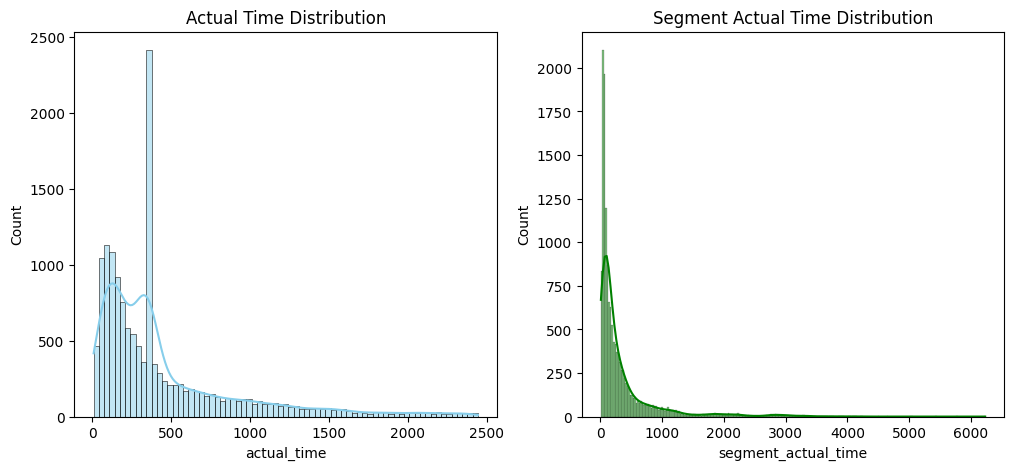

In [ ]:
# Visual Analysis between actual_time and segment_actual_time
# Visual Analysis: Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(actual_time, kde=True, color='skyblue')
plt.title('Actual Time Distribution')

plt.subplot(1, 2, 2)
sns.histplot(segment_actual_time, kde=True, color='green')
plt.title('Segment Actual Time Distribution')

plt.show()

###Hypothesis Testing between osrm_distance and segment_osrm_distance

Null Hypothesis (H0):

There is no significant difference in mean distance between osrm_distance and segment_osrm_distance.
Alternate Hypothesis (H1):

There is a significant difference in mean distance between osrm_distance and segment_osrm_distance.

In [ ]:
#Hypothesis Testing between osrm_distance and segment_osrm_distance

osrm_distance = aggregated_df['osrm_distance']
segment_osrm_distance = aggregated_df['segment_osrm_distance']

t_stat_osrm_distance, p_value_osrm_distance = ttest_ind(osrm_distance, segment_osrm_distance)
print("Hypothesis Testing Results:")
print("T-statistic:", t_stat_osrm_distance)
print("P-value:", p_value_osrm_distance)

Hypothesis Testing Results:
T-statistic: 30.34194367496046
P-value: 3.5950873377845114e-199


Since the p-value is less than the chosen significance level (alpha 0.05), we reject the null hypothesis and conclude that there is a significant difference in mean distances.

Now, Visualising same using Plot.

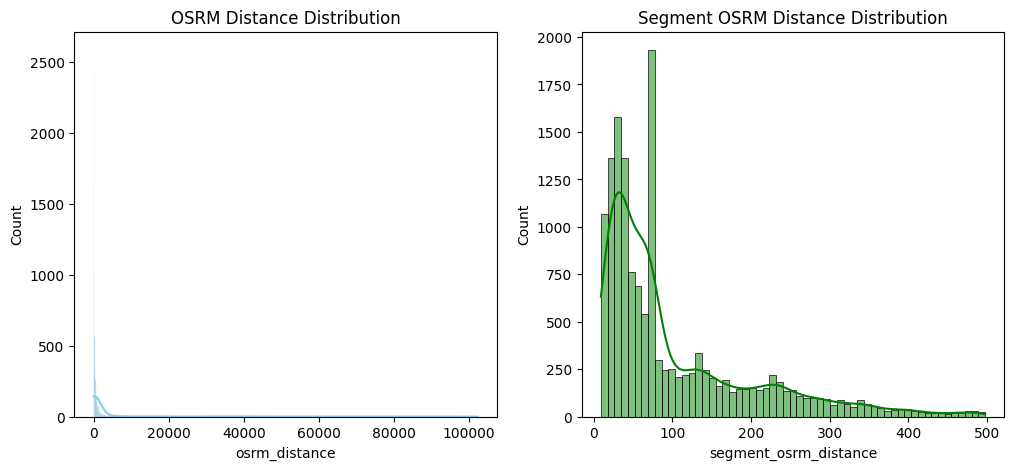

In [ ]:
#Visual Analysis between osrm_distance and segment_osrm_distance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(osrm_distance, kde=True, color='skyblue')
plt.title('OSRM Distance Distribution')

plt.subplot(1, 2, 2)
sns.histplot(segment_osrm_distance, kde=True, color='green')
plt.title('Segment OSRM Distance Distribution')

plt.show()

### Hypothesis Testing between osrm_time and segment_osrm_time
Null Hypothesis (H0):

There is no significant difference in mean time between osrm_time and segment_osrm_time.

Alternate Hypothesis (Ha):

There is a significant difference in mean time between osrm_time and segment_osrm_time.

In [ ]:
## Hypothesis Testing between osrm_time and segment_osrm_time
osrm_time = aggregated_df['osrm_time']
segment_osrm_time = aggregated_df['segment_osrm_time']

t_stat_osrm_time, p_value_osrm_time = ttest_ind(osrm_time, segment_osrm_time)
print("Hypothesis Testing Results:")
print("T-statistic:", t_stat_osrm_time)
print("P-value:", p_value_osrm_time)

Hypothesis Testing Results:
T-statistic: 63.852892396046855
P-value: 0.0


Since the p-value is not less than the chosen significance level (e.g., 0.05), we cannot reject the null hypothesis and conclude that there is no significant difference in mean times.

Now, Visualising in Plot

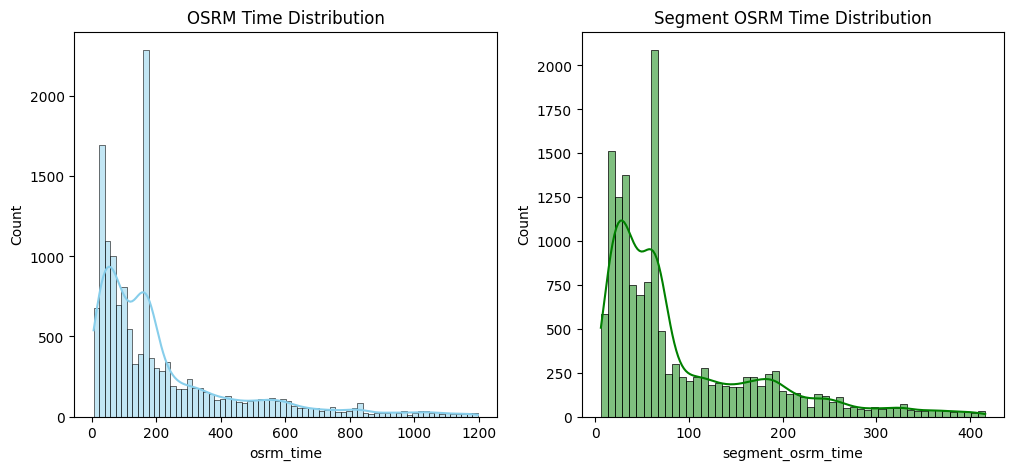

In [ ]:
# Visual Analysis between osrm_time and segment_osrm_time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(osrm_time, kde=True, color='skyblue')
plt.title('OSRM Time Distribution')

plt.subplot(1, 2, 2)
sns.histplot(segment_osrm_time, kde=True, color='green')
plt.title('Segment OSRM Time Distribution')

plt.show()

#Handling categorical values

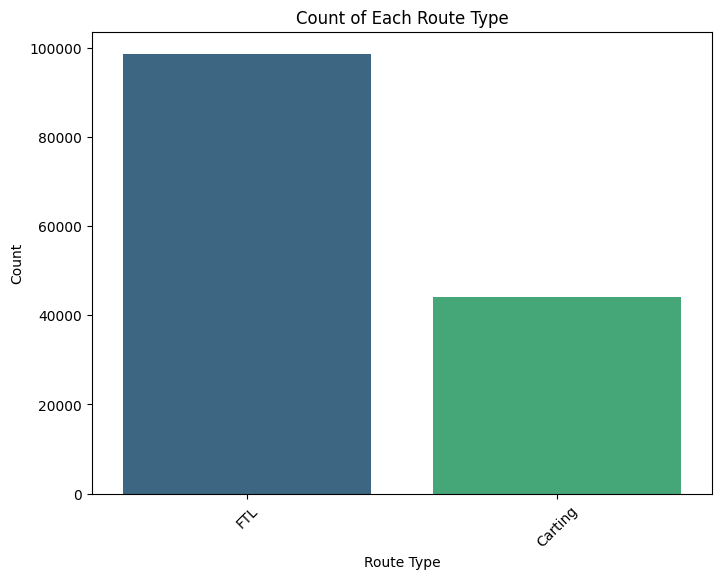

Count of each route type:
FTL        98626
Carting    44175
Name: route_type, dtype: int64


In [ ]:
# Route Type analysis
route_type_counts = df['route_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=route_type_counts.index, y=route_type_counts.values, palette='viridis')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.title('Count of Each Route Type')
plt.xticks(rotation=45)
plt.show()

# Display count values
print("Count of each route type:")
print(route_type_counts)

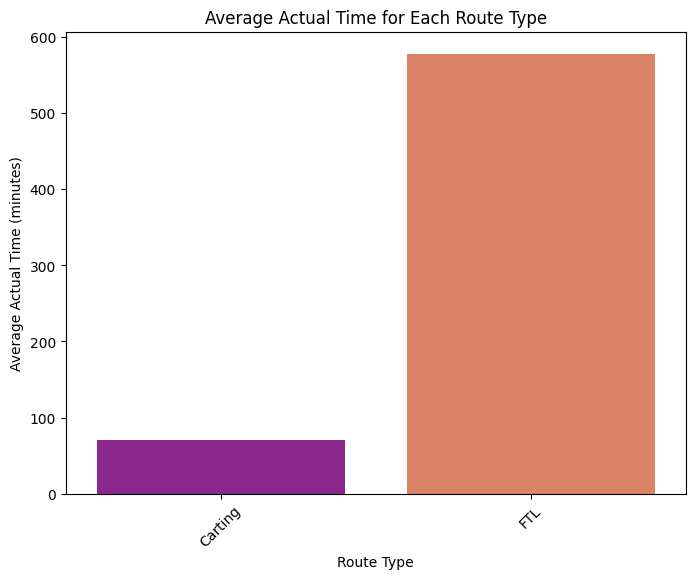

Average actual_time for each route type:
route_type
Carting     70.506984
FTL        578.268550
Name: actual_time, dtype: float64


In [ ]:
# Average actual time by each route
avg_actual_time_by_route = df.groupby('route_type')['actual_time'].mean()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_actual_time_by_route.index, y=avg_actual_time_by_route.values, palette='plasma')
plt.xlabel('Route Type')
plt.ylabel('Average Actual Time (minutes)')
plt.title('Average Actual Time for Each Route Type')
plt.xticks(rotation=45)
plt.show()

# Display average actual_time values
print("Average actual_time for each route type:")
print(avg_actual_time_by_route)

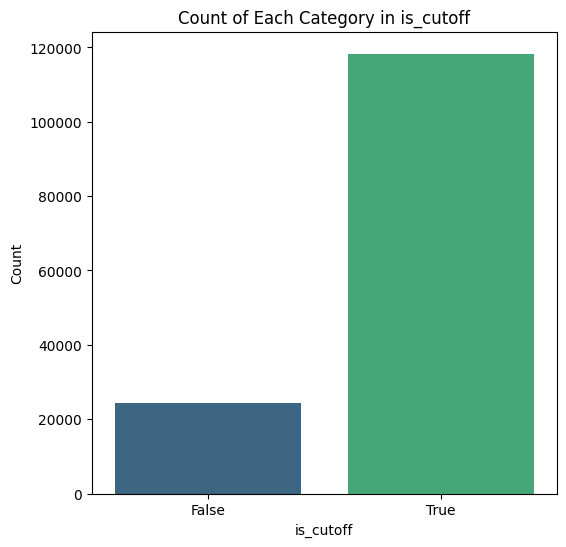

Count of each category in is_cutoff:
True     118336
False     24465
Name: is_cutoff, dtype: int64


In [ ]:
#Analysis of IS_CUTOFF column
# Count of each category in 'is_cutoff'
is_cutoff_counts = df['is_cutoff'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=is_cutoff_counts.index, y=is_cutoff_counts.values, palette='viridis')
plt.xlabel('is_cutoff')
plt.ylabel('Count')
plt.title('Count of Each Category in is_cutoff')
plt.show()

# Display count values
print("Count of each category in is_cutoff:")
print(is_cutoff_counts)

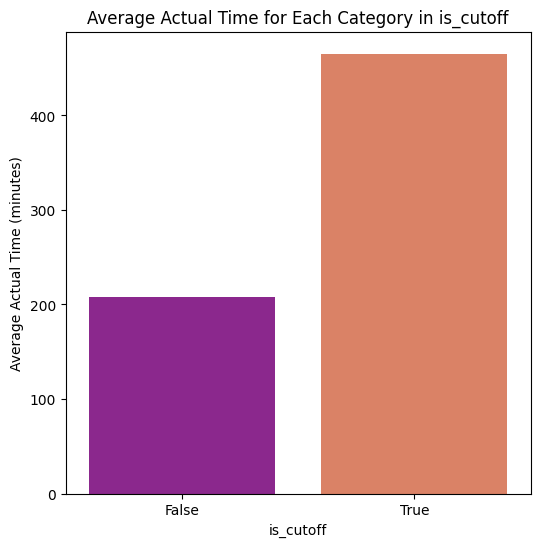

Average actual_time for each category in is_cutoff:
is_cutoff
False    207.854445
True     465.300509
Name: actual_time, dtype: float64


In [ ]:
# Average actual_time for each category in 'is_cutoff'
avg_actual_time_by_cutoff = df.groupby('is_cutoff')['actual_time'].mean()

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_actual_time_by_cutoff.index, y=avg_actual_time_by_cutoff.values, palette='plasma')
plt.xlabel('is_cutoff')
plt.ylabel('Average Actual Time (minutes)')
plt.title('Average Actual Time for Each Category in is_cutoff')
plt.show()

# Display average actual_time values
print("Average actual_time for each category in is_cutoff:")
print(avg_actual_time_by_cutoff)

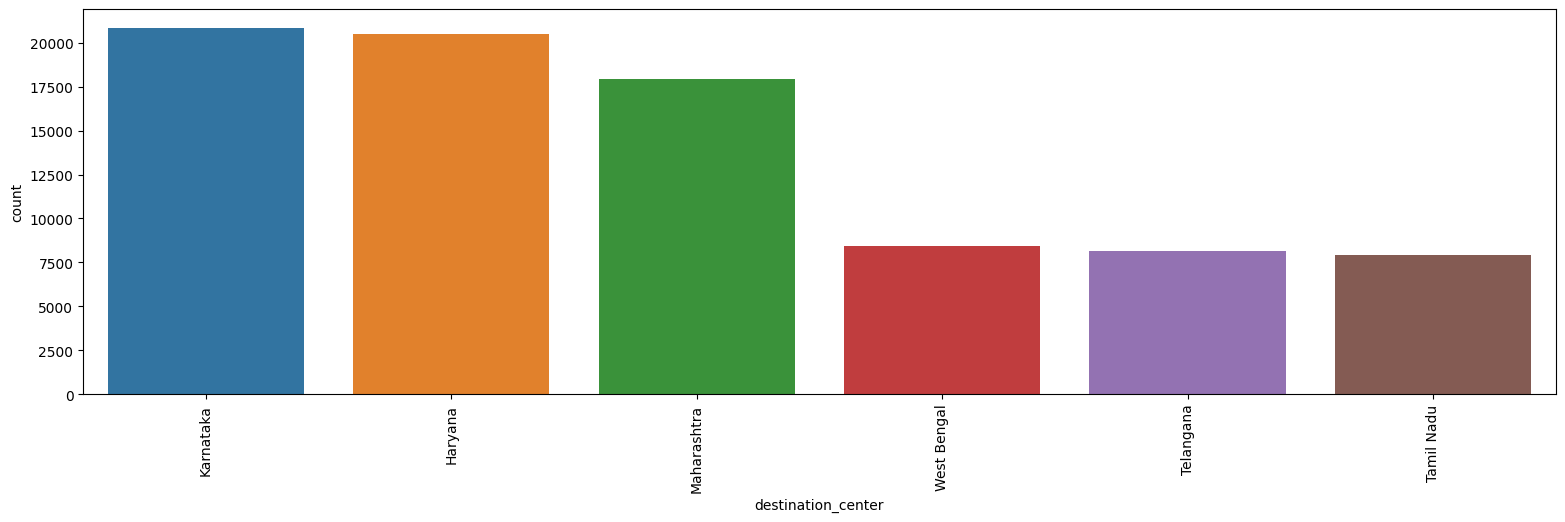

In [ ]:
df_sor_city=df['destination_state'].value_counts()[:6].reset_index()
plt.figure(figsize=(19,5))
ax=sns.barplot(data=df_sor_city,x=df_sor_city['index'],y=df_sor_city['destination_state'])
plt.xticks(rotation=90)
plt.xlabel("destination_center")
plt.ylabel("count")
plt.show()

#Column Normalization /Column Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
num_col = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_distance',
           'segment_osrm_time']
scaler = StandardScaler()
std_data = scaler.fit_transform(df[num_col])
std_data = pd.DataFrame(std_data,columns = df_new[num_col].columns)

In [ ]:
std_data

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,-0.851766,-0.652731,-0.677664,-0.662989,-0.652227,-0.420278,-0.623193,-0.522261
1,-0.851766,-0.628204,-0.661021,-0.633906,-0.629161,-0.494798,-0.747109,-0.658055
2,-0.851766,-0.603102,-0.634394,-0.608055,-0.603599,-0.383018,-0.687788,-0.793850
3,-0.851766,-0.578634,-0.597781,-0.569278,-0.572821,-0.289868,-0.563821,-0.454363
4,-0.851766,-0.569205,-0.587795,-0.556352,-0.552362,-0.569319,-1.075320,-0.929645
...,...,...,...,...,...,...,...,...
142796,-0.523923,-0.552263,-0.544525,-0.504649,-0.519959,-0.457538,-0.835468,-0.454363
142797,-0.523923,-0.526775,-0.501255,-0.452946,-0.477995,-0.196718,-0.319498,0.156712
142798,-0.523923,-0.491948,-0.467971,-0.414168,-0.451027,-0.308498,-0.132312,1.039377
142799,-0.523923,-0.470260,-0.438015,-0.381854,-0.417518,-0.364388,-0.234352,0.564096


#Business Insights

•	60% of the total orders were in the carting category and 40 % were from FTL.

•	Data presented that 87% of the orders took place in the 9th month and only 13% were in 10th month

•	The data was only for the year 2018.

•	Highest frequency for actual_time, osrm_time, segment_actual_time, segment_osrm_time columns were seen between 0-500

•	Highest Density of points in Duration in Minutes and start_scan_to_end_scan columns were seen in 0-2000.

•	Highest desnity in the actual_distance_to_destination, osrm_distance, segment_osrm_distance columns were observed in 0-500 where the highest density was in “Actual Distance”.

•	Top three states contributing to the orders are: Maharashtra, Karnataka, Haryana.

•	Lowest number of orders are from the following states: Tripura, Mizoram, Nagaland

•	There is a total of 867 cities where Delhivery Network is active.

•	Highest Destination States: Maharashtra, Karnataka, Haryana

•	Lowest Destination States: Tripura, Mizoram, Nagaland

•	Around 85 percent of the total distance is covered by the FTL orders whereas Carting is only 15 percent. Similarly, 78% of the total time taken in all deliveries is taken for FTL orders.

•	There is a discrepancy in the Average time taken for one delivery and Start and End time provided by the delivery executives.

•	There is a difference between the average of the actual time for delivery and the predicted time by OSRM

•	The average of both Actual time and Segment Time are equal, which means there is efficiency in the Warehouse Operations.

•	There is a gap between the means for distance and time provided by OSRM in respect to Segment and Total values. This makes OSRM inefficient.

•	Highest amount of distance and time is consumed in the following states: Maharashtra, Karnataka, Haryana. This is justified as highest number of orders are from the same state.

•	Busiest City Corridors: Bangalore-Bangalore, Mumbai-Mumbai

•	Most Time-Consuming Corridors: Guwahati-Bhiwandi, Purnia-Muzaffrpur, Bangalore – Chandigarh

•	Least Used City Corridors: Karaikal-Cuddalore,Hailakandi-Karimgang.

•	It has been observed same state orders contributes highly to the orders.

•	Significantly low percentages of orders are inter-state Orders. As, Punjab-Haryana is only 0.0068%, Tamil Nadu – Andhra Pradesh is 0.0068%

•	There is a linear relationship between Actual Distance and Start-End Scan time.


#Recommendations
•	Delhivery needs to improve on the Carting Orders by promoting the same for business growth.

•	As the highest density of orders are within 0-500 bracket, Delhivery should have a better network and bandwidth of transport for much larger order distance. This can help in revenue as well.

•	Delhivery is not performing up to the mark in certain areas of the country, they should try and break in the market in states like Tripura, Mizoram, Nagaland by promotions and discounts.

•	It has been observed that even though carting has a greater number of orders and FTL is supposed to be faster, Higher amount of time is taken by FTL in completing orders. The organisation needs to make FTL more efficient.

•	It has been observed that there is high discrepancy in time and distance given by OSRM. It makes it non reliable. Better data engines should be used for estimation.

•	Inter-state and Inter-City deliveries needs to be improved as it is taking higher amount of time.
